In [65]:
from astropy.table import Table, join, unique, Column
import astropy.units as u
from astropy.coordinates import Angle

# read source position from VLBI and Gaia catalogs.
tv = Table.read("/Users/Neo/Astronomy/Data/VLBISolutions/"
                "vlbi2_server/GalacticAberration/GaiaDR2-timespan-solutions/"
                "gaiadr2-timespan-noGAb.cat", format="ascii",
                names=["ivs_name", "iers_name", "ra", "dec",
                       "ra_err", "dec_err", "ra_dec_corr",
                       "epo_mean", "epo_beg", "epo_end",
                       "num_sess", "num_obs", "num_obsr", "flg"])
tv["ra"].unit = u.deg
tv["dec"].unit = u.deg

# Read Gaia DR2 IERS quasar
tg = Table.read("/Users/Neo/Astronomy/Data/catalogs/Gaia_DR2/"
                "gaiadr2_iers.fits")

t_com = join(tv, tg, keys="iers_name")

In [66]:
mask = (t_com["iers_name"] == "1213+350")
dra = (t_com[mask]["ra_2"] - t_com[mask]["ra_1"])[0] * 3.e6
ddec = (t_com[mask]["dec_2"] - t_com[mask]["dec_1"])[0] * 3.e6
print(dra)
print(ddec)
"""The unit is mas.
"""

-27.50947382423874
-16.233087578143568


'The unit is mas.\n'

In [67]:
"""I will play with the postscript file.
"""
from PIL import Image
im = Image.open("1213+350_X.png")
from __future__ import print_function
print(im.format, im.size, im.mode)

PNG (5620, 7560) RGBA


In [78]:
np.array([7560, 5620]) / 20 / 7 / 5 / 2

array([5.4       , 4.01428571])

In [69]:
# Read the corresponding pixel coordinates of x-axis and y-axis
# The coordinate of ra=(20, 0, -20) mas on the bottom line of the image for radio source 1213+350 are:
#  ra(mas)     x-pixel
#   20         122
#    0         256
#  -20         390
# The coordinate of dec=(0, -20, -40) mas on the bottom line of the image for radio source 1213+350 are:
#  dec(mas)     y-pixel
#    0          301
#  -20          435
#  -40          569
# NOTE: the positive direction of the coordinate is left-up.

def convert_x(ra):
    """Convert the right ascesion into the pixel coirdinate of x-axis.

    Parameter
    ---------
    ra : float
        right ascension in mas.

    Return
    ------
    x : float
        pixel coordinate of x-axis
    """

    x_scale = (122. - 390.) / 40.
    x = (ra - 0) * x_scale + 256

    return x

def convert_y(dec):
    """Convert the declination into the pixel coirdinate of x-axis.

    Parameter
    ---------
    dec : float
        declination in mas.

    Return
    ------
    y : float
        pixel coordinate of y-axis
    """

    y_scale = (301. - 569.) / 40.
    y = (dec - 0) * y_scale + 301

    return y

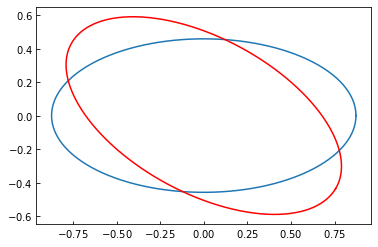

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos

# t = [i/np.pi for i in np.arange(0, 360)]

M, m = 0.873, 0.458
pa = 120

t = np.linspace(0, 2 * np.pi, 360)
x = M * np.cos(t)
y = m * sin(t)
plt.plot(x, y)

alpha = np.deg2rad(-pa + 90)

x1 = x * cos(alpha) - y * sin(alpha)
y1 = x * sin(alpha) + y * cos(alpha)

plt.plot(x1, y1, "r")

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos

def ellipse_rotation(M, m, pa):
    """Calculate the (x, y) position for an ellipse after rotation.
    
    Parameters
    ----------
    M : float
        major axis
    m : floar
        minor axis
    pa : float
        positional angle, degree.
        
    Returns
    -------
    x1/y1 : ndarray of float
    """

#     M, m = 0.873, 0.458
#     pa = 120

    t = np.linspace(0, 2 * np.pi, 360)
    x = M * np.cos(t)
    y = m * sin(t)
    plt.plot(x, y)

    alpha = np.deg2rad(-pa)

    x1 = x * cos(alpha) - y * sin(alpha)
    y1 = x * sin(alpha) + y * cos(alpha)

    return x1, y1

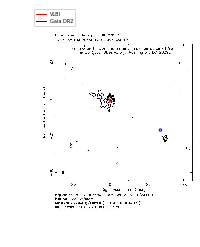

In [79]:
"""Code copied from https://matplotlib.org/examples/misc/sample_data_demo.html.
Grab mpl data from the ~/.matplotlib/sample_data cache if it exists, else
fetch it from GitHub and cache it
"""
from __future__ import print_function
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = "svg"
import numpy as np

# Plot the orignal map
fname = "TXS_1213+350_95APR12X.jpeg"
im = plt.imread(fname)

fig, ax = plt.subplots(figsize=(5.5, 4))
ax.imshow(im, cmap="gray")
ax.axis("off")

# Plot the VLBI and Gaia DR2 position
# scale
# x_scale = (122. - 390.) / 40. = 6.7
# y_scale = (301. - 569.) / 40. = 6.7
scale = -6.7

# VLBI
xv = (0 - 0) * scale + 256
yv = (0 - 0) * scale + 301
# ax.plot(xv, yv, "rx")
Mv, mv = 0.873 * scale, 0.458 * scale
x1v, y1v = ellipse_rotation(Mv, mv, 120)
ax.plot(x1v + xv, y1v + yv, "r", lw=1,
       label="VLBI")


# Gaia DR2
xg = (dra - 0) * scale + 256
yg = (ddec - 0) * scale + 301
# ax.plot(xg, yg, "bx")
Mg, mg = 0.653 * scale, 0.653 * scale
x1g, y1g = ellipse_rotation(Mg, mg, 179)
ax.plot(x1g + xg, y1g + yg, "b", lw=1,
       label="Gaia DR2")
ax.legend(loc="upper left", fontsize=5)

plt.savefig("1213+350.eps", dpi=480, bbox_inches="tight")